# FASHION MNIST

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_train = pd.read_csv('./fashion-mnist_train.csv')

In [4]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [3]:
df_test = pd.read_csv('./fashion-mnist_test.csv')

In [7]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = df_train.iloc[:, 1:].values
y_train = df_train.iloc[:, 0].values
X_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:, 0].values

In [5]:
def show_image(x):
    x = x.reshape(28, 28)
    plt.figure(figsize=(5,5))
    plt.imshow(x, cmap=plt.cm.Blues, interpolation='nearest')
    plt.show() 

## some pretty examples

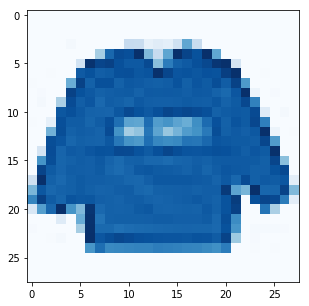

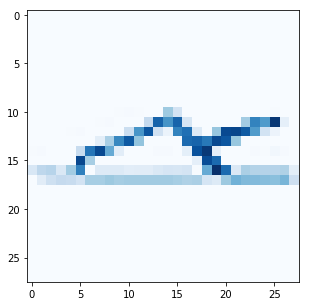

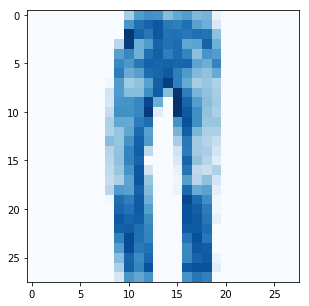

In [10]:
# 0, 7, 109 me gusta 

for i in [0, 7, 109]:
    show_image(X_train[i, :])

## the data is uniform distributed

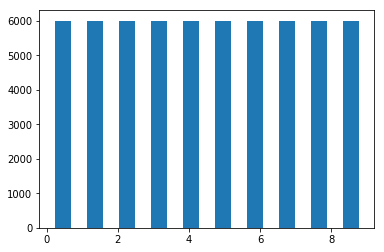

In [11]:
plt.hist(y_train, rwidth=0.5)
plt.show()SS,.

# Some image transformation

In [12]:
def mean_clothes(k):
    k_index = y_train == k
    mean_cl = np.mean(X_train[k_index, :], axis=0)
    show_image(mean_cl)

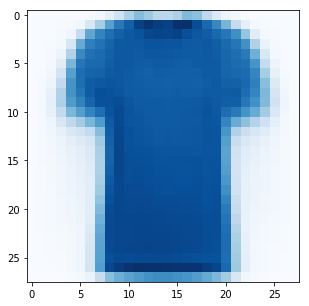

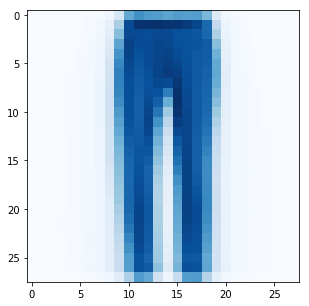

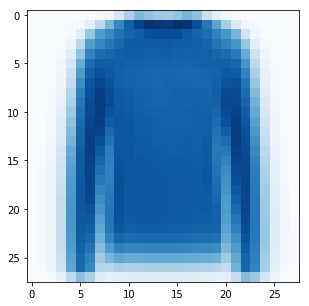

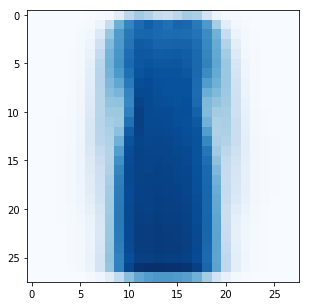

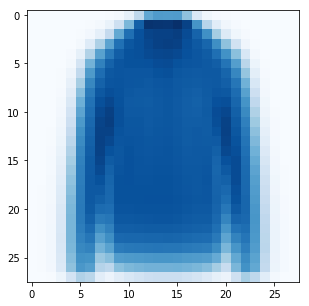

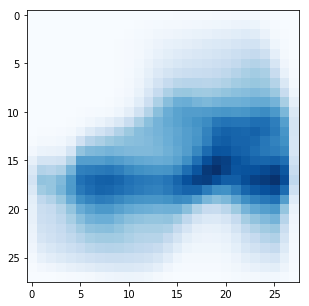

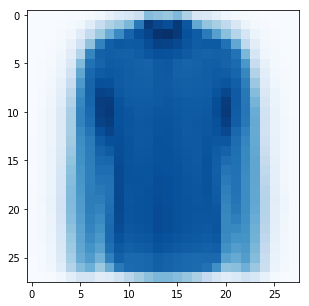

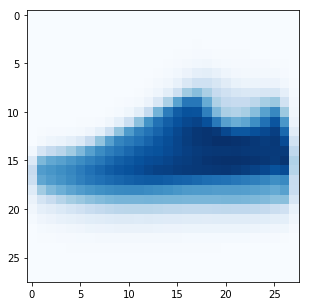

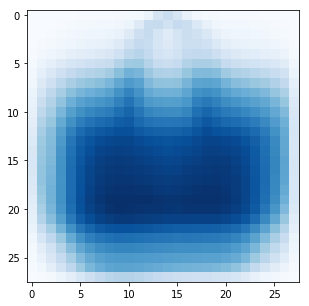

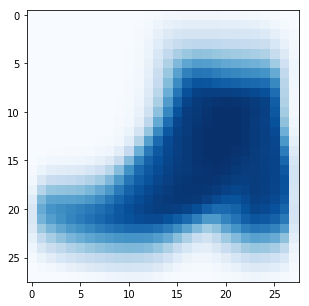

In [13]:
for i in range(10):    
    mean_clothes(i)

In [41]:
def flip_image(x):
    x = x.reshape(28, 28)
    x = np.fliplr(x)
    return x.reshape(-1)

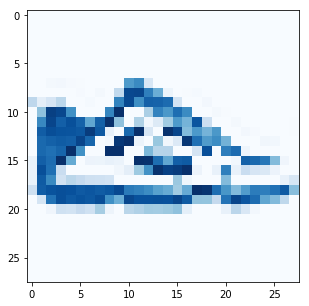

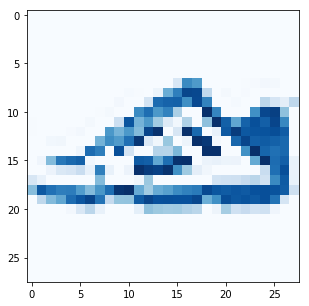

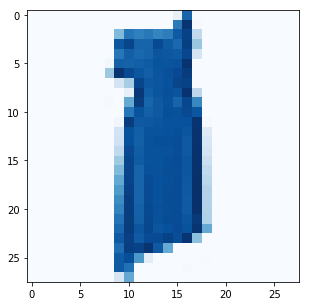

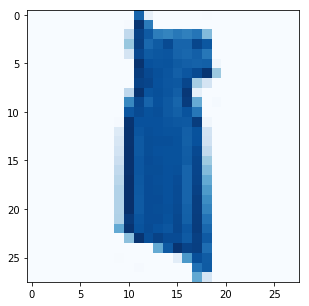

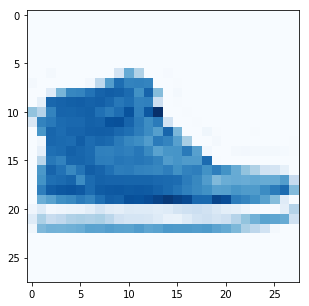

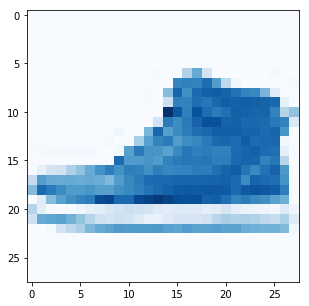

In [54]:
for i in [0, 1, 1264]:
    show_image(flip_image(X_train[i, :]))
    show_image(X_train[i, :])

In [108]:
# https://gist.github.com/fmder/e28813c1e8721830ff9c

import numpy
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

def elastic_transform(image, alpha, sigma, random_state=None):
    """Elastic deformation of images as described in [Simard2003]_.
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
       Convolutional Neural Networks applied to Visual Document Analysis", in
       Proc. of the International Conference on Document Analysis and
       Recognition, 2003.
    """
    if random_state is None:
        random_state = numpy.random.RandomState(None)
    else:
        random_state = numpy.random.RandomState(random_state)

    shape = image.shape
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha

    x, y = numpy.meshgrid(numpy.arange(shape[0]), numpy.arange(shape[1]))
    indices = numpy.reshape(y+dy, (-1, 1)), numpy.reshape(x+dx, (-1, 1))

    return map_coordinates(image, indices, order=1).reshape(shape)

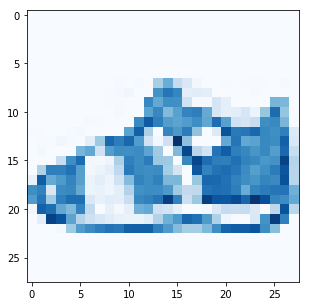

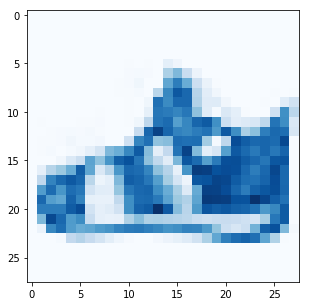

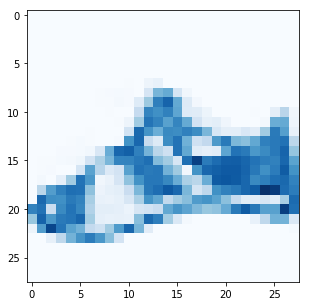

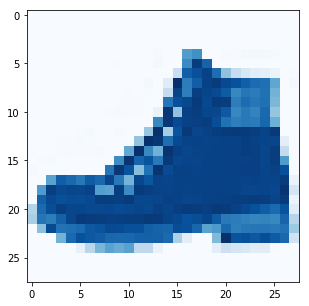

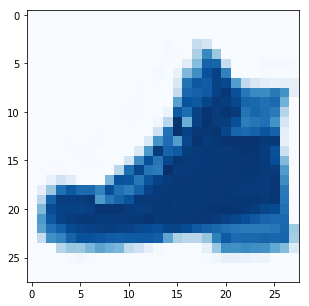

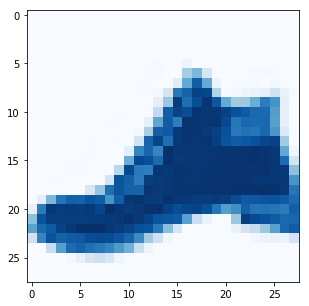

In [253]:
for i in [5, 40]:   
    show_image(X_train[i, :])
    for params in [
        {'alpha': 21, 'sigma': 4, 'random_state': 73},
        {'alpha': 26, 'sigma': 4, 'random_state': 34},
    ]:
        g = elastic_transform(X_train[i, :].reshape(28, 28), **params)
        show_image(g)


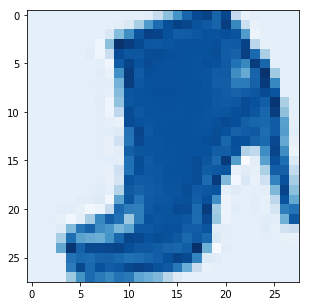

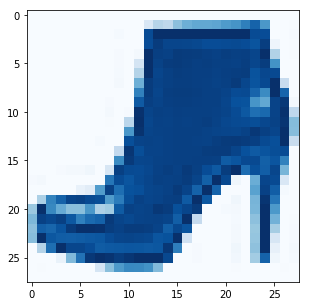

In [259]:
from scipy import ndimage
g = ndimage.interpolation.rotate(X_train[9809, :].reshape(28, 28), 18, reshape=False)
show_image(g)
show_image(X_train[9809, :])

# Logistic regression

In [6]:
X_test = X_test / 255.0
X_train = X_train / 255.0

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1337, stratify=y_train)

In [10]:
#logistic reg

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(verbose=2)
clf.fit(X_train, y_train)
score1 = clf.score(X_val, y_val)
print(score1)

[LibLinear]0.85275


In [11]:
# verschiedene C for logistic reg

score_log = [0] * 9
C_train = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

for i in range(9):
    clf_train = LogisticRegression(verbose=2, C=C_train[i])
    clf_train.fit(X_train, y_train)
    score_log[i] = clf_train.score(X_val, y_val)    

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

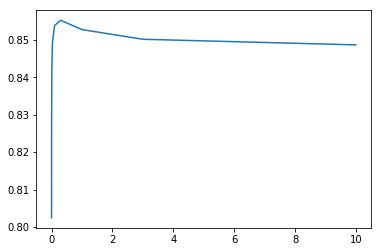

In [55]:
plt.plot(C_train, score_log)
plt.show()

In [63]:
score_log

[0.80241666666666667,
 0.82791666666666663,
 0.84191666666666665,
 0.84924999999999995,
 0.85383333333333333,
 0.85524999999999995,
 0.85275000000000001,
 0.85016666666666663,
 0.84866666666666668]

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

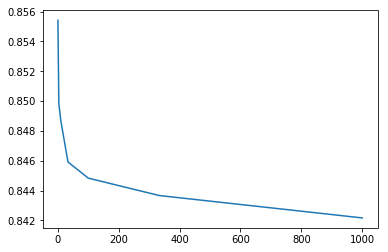

In [56]:
score_log2 = [0 for i in range(7)]
C_train2 = [1/0.001, 1/0.003, 1/0.01, 1/0.03, 1/0.1, 1/0.3, 1/3.0]

for i in range(7):
    clf_train2 = LogisticRegression(verbose=2, C=C_train2[i])
    clf_train2.fit(X_train, y_train)
    score_log2[i] = clf_train2.score(X_val, y_val)
    
plt.plot(C_train2, score_log2)
plt.show()

In [64]:
score_log2

[0.84216666666666662,
 0.84366666666666668,
 0.84483333333333333,
 0.84591666666666665,
 0.84866666666666668,
 0.84983333333333333,
 0.85541666666666671]

## the best score: `0.8552` with `C=0.3`

# Multi-layer Perceptron classifier

In [25]:
# NN

from sklearn.neural_network import MLPClassifier

clf2 = MLPClassifier(solver='adam', hidden_layer_sizes=(128,), random_state=1, max_iter=50, verbose=True)
clf2.fit(X_train, y_train)
score2 = clf2.score(X_val, y_val)
print(score2)

Iteration 1, loss = 0.61301231
Iteration 2, loss = 0.43381343
Iteration 3, loss = 0.39176189
Iteration 4, loss = 0.36228112
Iteration 5, loss = 0.34084181
Iteration 6, loss = 0.32772855
Iteration 7, loss = 0.31227195
Iteration 8, loss = 0.30744296
Iteration 9, loss = 0.29194805
Iteration 10, loss = 0.28119689
Iteration 11, loss = 0.27448659
Iteration 12, loss = 0.26694888
Iteration 13, loss = 0.26110808
Iteration 14, loss = 0.25246797
Iteration 15, loss = 0.24862335
Iteration 16, loss = 0.23995806
Iteration 17, loss = 0.23531671
Iteration 18, loss = 0.22990680
Iteration 19, loss = 0.22743079
Iteration 20, loss = 0.21702368
Iteration 21, loss = 0.21382564
Iteration 22, loss = 0.20998514
Iteration 23, loss = 0.20580884
Iteration 24, loss = 0.20244359
Iteration 25, loss = 0.19796346
Iteration 26, loss = 0.19469655
Iteration 27, loss = 0.18910745
Iteration 28, loss = 0.18266466
Iteration 29, loss = 0.18154347
Iteration 30, loss = 0.17499738
Iteration 31, loss = 0.17281727
Iteration 32, los

/Users/ann/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [24]:
x = np.append(X_train, X_val, axis=0)

In [28]:
y = np.append(y_train, y_val, axis=0)

In [31]:
# grid search NN

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'hidden_layer_sizes':[(280,),(140),(280, 280), (140, 140), (280, 140)],\
              'activation':('logistic', 'tanh', 'relu'), 'alpha':[0.01, 0.03, 0.1, 0.3, 0.6, 1, 3, 10]}
nn = MLPClassifier(max_iter=100, verbose=True, random_state=1)
clf6 = GridSearchCV(nn, parameters)
clf6.fit(x, y)


Iteration 1, loss = 0.81653268
Iteration 2, loss = 0.50826639
Iteration 3, loss = 0.45902357
Iteration 4, loss = 0.43393461
Iteration 5, loss = 0.41540326
Iteration 6, loss = 0.40037597
Iteration 7, loss = 0.39290784
Iteration 8, loss = 0.38285540
Iteration 9, loss = 0.37569244
Iteration 10, loss = 0.36987943
Iteration 11, loss = 0.36156442
Iteration 12, loss = 0.35741629
Iteration 13, loss = 0.35467650
Iteration 14, loss = 0.34816917
Iteration 15, loss = 0.34271170
Iteration 16, loss = 0.33971454
Iteration 17, loss = 0.33435930
Iteration 18, loss = 0.33192773
Iteration 19, loss = 0.33087955
Iteration 20, loss = 0.32607434
Iteration 21, loss = 0.31973596
Iteration 22, loss = 0.31755432
Iteration 23, loss = 0.31513732
Iteration 24, loss = 0.31325547
Iteration 25, loss = 0.30865476
Iteration 26, loss = 0.30635886
Iteration 27, loss = 0.30231516
Iteration 28, loss = 0.30083831
Iteration 29, loss = 0.29850482
Iteration 30, loss = 0.29585127
Iteration 31, loss = 0.29225474
Iteration 32, los

Iteration 1, loss = 0.94532279
Iteration 2, loss = 0.54824213
Iteration 3, loss = 0.47715532
Iteration 4, loss = 0.44294432
Iteration 5, loss = 0.42212322
Iteration 6, loss = 0.40706399
Iteration 7, loss = 0.39557740
Iteration 8, loss = 0.38690336
Iteration 9, loss = 0.37752396
Iteration 10, loss = 0.37035334
Iteration 11, loss = 0.36400888
Iteration 12, loss = 0.35870205
Iteration 13, loss = 0.35309811
Iteration 14, loss = 0.34836281
Iteration 15, loss = 0.34279593
Iteration 16, loss = 0.33876843
Iteration 17, loss = 0.33357955
Iteration 18, loss = 0.33169435
Iteration 19, loss = 0.32949931
Iteration 20, loss = 0.32306944
Iteration 21, loss = 0.32067107
Iteration 22, loss = 0.31856690
Iteration 23, loss = 0.31226767
Iteration 24, loss = 0.31191380
Iteration 25, loss = 0.30978098
Iteration 26, loss = 0.30575023
Iteration 27, loss = 0.30223335
Iteration 28, loss = 0.30254223
Iteration 29, loss = 0.29824828
Iteration 30, loss = 0.29565078
Iteration 31, loss = 0.29335245
Iteration 32, los

Iteration 74, loss = 0.23276285
Iteration 75, loss = 0.23557755
Iteration 76, loss = 0.23262302
Iteration 77, loss = 0.23194026
Iteration 78, loss = 0.23089339
Iteration 79, loss = 0.22918587
Iteration 80, loss = 0.22790643
Iteration 81, loss = 0.22822511
Iteration 82, loss = 0.22759219
Iteration 83, loss = 0.22651003
Iteration 84, loss = 0.22469883
Iteration 85, loss = 0.22346005
Iteration 86, loss = 0.22418780
Iteration 87, loss = 0.22286609
Iteration 88, loss = 0.22289579
Iteration 89, loss = 0.22166395
Iteration 90, loss = 0.22099247
Iteration 91, loss = 0.21980612
Iteration 92, loss = 0.22008050
Iteration 93, loss = 0.21884483
Iteration 94, loss = 0.21720186
Iteration 95, loss = 0.21800710
Iteration 96, loss = 0.21802817
Iteration 97, loss = 0.21842210
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.99819487
Iteration 2, loss = 0.53166804
Iteration 3, loss = 0.46531132
Iteration 4, loss = 0.43569107
Iteration 5, loss

Iteration 42, loss = 0.25518020
Iteration 43, loss = 0.25465320
Iteration 44, loss = 0.25171108
Iteration 45, loss = 0.25012021
Iteration 46, loss = 0.24934334
Iteration 47, loss = 0.24800080
Iteration 48, loss = 0.24571619
Iteration 49, loss = 0.24233213
Iteration 50, loss = 0.24466261
Iteration 51, loss = 0.24158930
Iteration 52, loss = 0.23992036
Iteration 53, loss = 0.23779202
Iteration 54, loss = 0.23824059
Iteration 55, loss = 0.23505030
Iteration 56, loss = 0.23162621
Iteration 57, loss = 0.23109587
Iteration 58, loss = 0.22738177
Iteration 59, loss = 0.22814940
Iteration 60, loss = 0.22636745
Iteration 61, loss = 0.22695505
Iteration 62, loss = 0.22206001
Iteration 63, loss = 0.22109753
Iteration 64, loss = 0.22459168
Iteration 65, loss = 0.21607834
Iteration 66, loss = 0.21916458
Iteration 67, loss = 0.21879796
Iteration 68, loss = 0.21552129
Iteration 69, loss = 0.21350656
Iteration 70, loss = 0.21309964
Iteration 71, loss = 0.21018654
Iteration 72, loss = 0.21291117
Iteratio

Iteration 39, loss = 0.26755722
Iteration 40, loss = 0.26377271
Iteration 41, loss = 0.26466830
Iteration 42, loss = 0.26519801
Iteration 43, loss = 0.26095450
Iteration 44, loss = 0.25832248
Iteration 45, loss = 0.25447497
Iteration 46, loss = 0.25547531
Iteration 47, loss = 0.25457106
Iteration 48, loss = 0.25313848
Iteration 49, loss = 0.24645470
Iteration 50, loss = 0.24407614
Iteration 51, loss = 0.24671040
Iteration 52, loss = 0.24642780
Iteration 53, loss = 0.24097239
Iteration 54, loss = 0.23992061
Iteration 55, loss = 0.23538977
Iteration 56, loss = 0.23698233
Iteration 57, loss = 0.23397529
Iteration 58, loss = 0.23365507
Iteration 59, loss = 0.23175638
Iteration 60, loss = 0.23922486
Iteration 61, loss = 0.22743438
Iteration 62, loss = 0.23208796
Iteration 63, loss = 0.22474999
Iteration 64, loss = 0.22769805
Iteration 65, loss = 0.22709549
Iteration 66, loss = 0.22076761
Iteration 67, loss = 0.22387154
Iteration 68, loss = 0.21769123
Iteration 69, loss = 0.21867484
Iteratio

Iteration 7, loss = 0.43623418
Iteration 8, loss = 0.42724817
Iteration 9, loss = 0.42275989
Iteration 10, loss = 0.41640437
Iteration 11, loss = 0.40937129
Iteration 12, loss = 0.40634626
Iteration 13, loss = 0.40153036
Iteration 14, loss = 0.40233498
Iteration 15, loss = 0.39415174
Iteration 16, loss = 0.39239266
Iteration 17, loss = 0.38965784
Iteration 18, loss = 0.38703130
Iteration 19, loss = 0.38398011
Iteration 20, loss = 0.38189866
Iteration 21, loss = 0.37685713
Iteration 22, loss = 0.37407872
Iteration 23, loss = 0.37436962
Iteration 24, loss = 0.37062572
Iteration 25, loss = 0.36786567
Iteration 26, loss = 0.36808865
Iteration 27, loss = 0.36741755
Iteration 28, loss = 0.36382036
Iteration 29, loss = 0.36534988
Iteration 30, loss = 0.36015575
Iteration 31, loss = 0.35822285
Iteration 32, loss = 0.36127331
Iteration 33, loss = 0.35650408
Iteration 34, loss = 0.35330686
Iteration 35, loss = 0.35655550
Iteration 36, loss = 0.35563601
Iteration 37, loss = 0.35224027
Iteration 3

Iteration 23, loss = 0.37256029
Iteration 24, loss = 0.36667874
Iteration 25, loss = 0.36527950
Iteration 26, loss = 0.36295096
Iteration 27, loss = 0.36242815
Iteration 28, loss = 0.36088589
Iteration 29, loss = 0.35794646
Iteration 30, loss = 0.35678639
Iteration 31, loss = 0.35566582
Iteration 32, loss = 0.35262607
Iteration 33, loss = 0.35259930
Iteration 34, loss = 0.35115549
Iteration 35, loss = 0.35110739
Iteration 36, loss = 0.35154324
Iteration 37, loss = 0.34819599
Iteration 38, loss = 0.34490795
Iteration 39, loss = 0.34481070
Iteration 40, loss = 0.34540735
Iteration 41, loss = 0.34160411
Iteration 42, loss = 0.34105671
Iteration 43, loss = 0.34266004
Iteration 44, loss = 0.34108747
Iteration 45, loss = 0.33762253
Iteration 46, loss = 0.33748327
Iteration 47, loss = 0.33617278
Iteration 48, loss = 0.33895007
Iteration 49, loss = 0.33704061
Iteration 50, loss = 0.33306199
Iteration 51, loss = 0.33283485
Iteration 52, loss = 0.33542013
Iteration 53, loss = 0.33186186
Iteratio

Iteration 5, loss = 0.47022590
Iteration 6, loss = 0.45468099
Iteration 7, loss = 0.44527762
Iteration 8, loss = 0.43628301
Iteration 9, loss = 0.42591081
Iteration 10, loss = 0.41970408
Iteration 11, loss = 0.41535977
Iteration 12, loss = 0.40941029
Iteration 13, loss = 0.40894335
Iteration 14, loss = 0.40188096
Iteration 15, loss = 0.39851801
Iteration 16, loss = 0.39548885
Iteration 17, loss = 0.39328652
Iteration 18, loss = 0.38667721
Iteration 19, loss = 0.38947791
Iteration 20, loss = 0.38694636
Iteration 21, loss = 0.38334767
Iteration 22, loss = 0.37789277
Iteration 23, loss = 0.37768073
Iteration 24, loss = 0.37282137
Iteration 25, loss = 0.37389943
Iteration 26, loss = 0.36968926
Iteration 27, loss = 0.36535627
Iteration 28, loss = 0.36414949
Iteration 29, loss = 0.36493605
Iteration 30, loss = 0.36538575
Iteration 31, loss = 0.36307093
Iteration 32, loss = 0.35731460
Iteration 33, loss = 0.35876806
Iteration 34, loss = 0.35466542
Iteration 35, loss = 0.35350203
Iteration 36,

Iteration 15, loss = 0.40787851
Iteration 16, loss = 0.40421994
Iteration 17, loss = 0.39764644
Iteration 18, loss = 0.39589028
Iteration 19, loss = 0.39644892
Iteration 20, loss = 0.39032661
Iteration 21, loss = 0.38740458
Iteration 22, loss = 0.38588174
Iteration 23, loss = 0.38557439
Iteration 24, loss = 0.38553155
Iteration 25, loss = 0.37739463
Iteration 26, loss = 0.37590464
Iteration 27, loss = 0.37545702
Iteration 28, loss = 0.37360153
Iteration 29, loss = 0.37468621
Iteration 30, loss = 0.37004868
Iteration 31, loss = 0.36936797
Iteration 32, loss = 0.36989655
Iteration 33, loss = 0.36761099
Iteration 34, loss = 0.36465139
Iteration 35, loss = 0.36200510
Iteration 36, loss = 0.36167457
Iteration 37, loss = 0.36192453
Iteration 38, loss = 0.36419960
Iteration 39, loss = 0.35778792
Iteration 40, loss = 0.35676199
Iteration 41, loss = 0.35713185
Iteration 42, loss = 0.35494591
Iteration 43, loss = 0.35284514
Iteration 44, loss = 0.35415514
Iteration 45, loss = 0.34890545
Iteratio

Iteration 24, loss = 0.45517468
Iteration 25, loss = 0.45477038
Iteration 26, loss = 0.45413431
Iteration 27, loss = 0.45455309
Iteration 28, loss = 0.45434957
Iteration 29, loss = 0.45181235
Iteration 30, loss = 0.45328707
Iteration 31, loss = 0.45222913
Iteration 32, loss = 0.44935110
Iteration 33, loss = 0.45074476
Iteration 34, loss = 0.44896998
Iteration 35, loss = 0.45150654
Iteration 36, loss = 0.45248944
Iteration 37, loss = 0.44926688
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.10511183
Iteration 2, loss = 0.66783579
Iteration 3, loss = 0.60677008
Iteration 4, loss = 0.58322144
Iteration 5, loss = 0.56287325
Iteration 6, loss = 0.55452122
Iteration 7, loss = 0.54693891
Iteration 8, loss = 0.53709095
Iteration 9, loss = 0.53113550
Iteration 10, loss = 0.52987665
Iteration 11, loss = 0.52490696
Iteration 12, loss = 0.52854862
Iteration 13, loss = 0.51968222
Iteration 14, loss = 0.51558664
Iteration 15, loss = 0

Iteration 9, loss = 0.53368461
Iteration 10, loss = 0.53068978
Iteration 11, loss = 0.52616643
Iteration 12, loss = 0.52349373
Iteration 13, loss = 0.51862715
Iteration 14, loss = 0.51624371
Iteration 15, loss = 0.51596114
Iteration 16, loss = 0.51214570
Iteration 17, loss = 0.51133821
Iteration 18, loss = 0.50987029
Iteration 19, loss = 0.50808919
Iteration 20, loss = 0.50561254
Iteration 21, loss = 0.50570428
Iteration 22, loss = 0.50245073
Iteration 23, loss = 0.50298157
Iteration 24, loss = 0.50165596
Iteration 25, loss = 0.50058139
Iteration 26, loss = 0.50260801
Iteration 27, loss = 0.49841613
Iteration 28, loss = 0.49938195
Iteration 29, loss = 0.49370760
Iteration 30, loss = 0.49654245
Iteration 31, loss = 0.49841676
Iteration 32, loss = 0.49417843
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.18599780
Iteration 2, loss = 0.68332636
Iteration 3, loss = 0.61960541
Iteration 4, loss = 0.58756743
Iteration 5, loss 

Iteration 15, loss = 0.68747114
Iteration 16, loss = 0.68728884
Iteration 17, loss = 0.68601748
Iteration 18, loss = 0.69033828
Iteration 19, loss = 0.68523707
Iteration 20, loss = 0.68118030
Iteration 21, loss = 0.68326490
Iteration 22, loss = 0.68007684
Iteration 23, loss = 0.68011813
Iteration 24, loss = 0.67990356
Iteration 25, loss = 0.68104055
Iteration 26, loss = 0.67717866
Iteration 27, loss = 0.67645986
Iteration 28, loss = 0.68100597
Iteration 29, loss = 0.67888347
Iteration 30, loss = 0.67470230
Iteration 31, loss = 0.67644405
Iteration 32, loss = 0.67621080
Iteration 33, loss = 0.68064169
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.25581498
Iteration 2, loss = 0.83010951
Iteration 3, loss = 0.77159247
Iteration 4, loss = 0.74852024
Iteration 5, loss = 0.73024827
Iteration 6, loss = 0.72445088
Iteration 7, loss = 0.71484100
Iteration 8, loss = 0.71304797
Iteration 9, loss = 0.70353651
Iteration 10, loss = 0

Iteration 19, loss = 0.70057219
Iteration 20, loss = 0.70434275
Iteration 21, loss = 0.70320601
Iteration 22, loss = 0.70202893
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.08099931
Iteration 2, loss = 0.77356380
Iteration 3, loss = 0.73547749
Iteration 4, loss = 0.72190955
Iteration 5, loss = 0.71554818
Iteration 6, loss = 0.71265010
Iteration 7, loss = 0.70993576
Iteration 8, loss = 0.70842334
Iteration 9, loss = 0.70415949
Iteration 10, loss = 0.70490850
Iteration 11, loss = 0.70079648
Iteration 12, loss = 0.70636542
Iteration 13, loss = 0.70101178
Iteration 14, loss = 0.70166099
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.14694086
Iteration 2, loss = 0.79815702
Iteration 3, loss = 0.74831401
Iteration 4, loss = 0.72657427
Iteration 5, loss = 0.71667061
Iteration 6, loss = 0.71095892
Iteration 7, loss = 0.70769760
Iteration 8, loss = 0.70557442
Ite

Iteration 3, loss = 0.93608164
Iteration 4, loss = 0.90899642
Iteration 5, loss = 0.89768490
Iteration 6, loss = 0.88799054
Iteration 7, loss = 0.88081189
Iteration 8, loss = 0.87930182
Iteration 9, loss = 0.87269636
Iteration 10, loss = 0.86980057
Iteration 11, loss = 0.87020761
Iteration 12, loss = 0.86926344
Iteration 13, loss = 0.86663256
Iteration 14, loss = 0.86566689
Iteration 15, loss = 0.86576598
Iteration 16, loss = 0.86430167
Iteration 17, loss = 0.86348909
Iteration 18, loss = 0.86421291
Iteration 19, loss = 0.86761761
Iteration 20, loss = 0.85913930
Iteration 21, loss = 0.85956782
Iteration 22, loss = 0.85923148
Iteration 23, loss = 0.85968039
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.48954795
Iteration 2, loss = 1.00813732
Iteration 3, loss = 0.94024416
Iteration 4, loss = 0.90982929
Iteration 5, loss = 0.90057520
Iteration 6, loss = 0.89228765
Iteration 7, loss = 0.88457221
Iteration 8, loss = 0.88243

Iteration 32, loss = 1.02044292
Iteration 33, loss = 1.02460849
Iteration 34, loss = 1.02050663
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.58639679
Iteration 2, loss = 1.14868315
Iteration 3, loss = 1.08748652
Iteration 4, loss = 1.06902449
Iteration 5, loss = 1.05031967
Iteration 6, loss = 1.04977731
Iteration 7, loss = 1.04037383
Iteration 8, loss = 1.04249414
Iteration 9, loss = 1.03602248
Iteration 10, loss = 1.03396434
Iteration 11, loss = 1.03613307
Iteration 12, loss = 1.03535752
Iteration 13, loss = 1.03395552
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.58746694
Iteration 2, loss = 1.14740761
Iteration 3, loss = 1.08392302
Iteration 4, loss = 1.06362661
Iteration 5, loss = 1.05144522
Iteration 6, loss = 1.04075091
Iteration 7, loss = 1.03846847
Iteration 8, loss = 1.03957250
Iteration 9, loss = 1.03342525
Iteration 10, loss = 1.03340278
Iter

Iteration 1, loss = 1.50318671
Iteration 2, loss = 1.20182206
Iteration 3, loss = 1.18094378
Iteration 4, loss = 1.17550587
Iteration 5, loss = 1.16933527
Iteration 6, loss = 1.16751490
Iteration 7, loss = 1.16444050
Iteration 8, loss = 1.16086723
Iteration 9, loss = 1.16187861
Iteration 10, loss = 1.16103477
Iteration 11, loss = 1.15805836
Iteration 12, loss = 1.15883032
Iteration 13, loss = 1.15799438
Iteration 14, loss = 1.15641473
Iteration 15, loss = 1.15511126
Iteration 16, loss = 1.15505545
Iteration 17, loss = 1.15566785
Iteration 18, loss = 1.15596609
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.50510441
Iteration 2, loss = 1.20166823
Iteration 3, loss = 1.17888415
Iteration 4, loss = 1.17276896
Iteration 5, loss = 1.16650594
Iteration 6, loss = 1.16545590
Iteration 7, loss = 1.16263941
Iteration 8, loss = 1.16058219
Iteration 9, loss = 1.15958734
Iteration 10, loss = 1.15887940
Iteration 11, loss = 1.15749890

Iteration 11, loss = 1.71185319
Iteration 12, loss = 1.71322410
Iteration 13, loss = 1.71205795
Iteration 14, loss = 1.71127171
Iteration 15, loss = 1.71356403
Iteration 16, loss = 1.70979132
Iteration 17, loss = 1.70908819
Iteration 18, loss = 1.71358294
Iteration 19, loss = 1.71161998
Iteration 20, loss = 1.71179712
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.08786292
Iteration 2, loss = 1.73855651
Iteration 3, loss = 1.72660752
Iteration 4, loss = 1.72116924
Iteration 5, loss = 1.71890604
Iteration 6, loss = 1.71618146
Iteration 7, loss = 1.71594725
Iteration 8, loss = 1.71497826
Iteration 9, loss = 1.71508343
Iteration 10, loss = 1.71572617
Iteration 11, loss = 1.71220290
Iteration 12, loss = 1.71277230
Iteration 13, loss = 1.70997612
Iteration 14, loss = 1.71294763
Iteration 15, loss = 1.71224810
Iteration 16, loss = 1.70995694
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopp

Iteration 24, loss = 0.23136517
Iteration 25, loss = 0.22719991
Iteration 26, loss = 0.22334866
Iteration 27, loss = 0.21862671
Iteration 28, loss = 0.21898717
Iteration 29, loss = 0.21423964
Iteration 30, loss = 0.20979889
Iteration 31, loss = 0.20647322
Iteration 32, loss = 0.20676731
Iteration 33, loss = 0.20063664
Iteration 34, loss = 0.19694175
Iteration 35, loss = 0.19444910
Iteration 36, loss = 0.19295556
Iteration 37, loss = 0.18978821
Iteration 38, loss = 0.19126256
Iteration 39, loss = 0.18619480
Iteration 40, loss = 0.18284746
Iteration 41, loss = 0.18397905
Iteration 42, loss = 0.17732797
Iteration 43, loss = 0.17720507
Iteration 44, loss = 0.17477418
Iteration 45, loss = 0.17347402
Iteration 46, loss = 0.17441499
Iteration 47, loss = 0.16827888
Iteration 48, loss = 0.16834669
Iteration 49, loss = 0.16508423
Iteration 50, loss = 0.16139415
Iteration 51, loss = 0.16115231
Iteration 52, loss = 0.16040921
Iteration 53, loss = 0.15631188
Iteration 54, loss = 0.15466758
Iteratio

Iteration 1, loss = 0.61906524
Iteration 2, loss = 0.44449328
Iteration 3, loss = 0.40516705
Iteration 4, loss = 0.38156673
Iteration 5, loss = 0.36871750
Iteration 6, loss = 0.35069125
Iteration 7, loss = 0.33908793
Iteration 8, loss = 0.32869585
Iteration 9, loss = 0.31972336
Iteration 10, loss = 0.31291702
Iteration 11, loss = 0.30425928
Iteration 12, loss = 0.29661484
Iteration 13, loss = 0.29076195
Iteration 14, loss = 0.28228102
Iteration 15, loss = 0.27741399
Iteration 16, loss = 0.27004910
Iteration 17, loss = 0.26512229
Iteration 18, loss = 0.25851850
Iteration 19, loss = 0.25486373
Iteration 20, loss = 0.25228460
Iteration 21, loss = 0.24543326
Iteration 22, loss = 0.24348908
Iteration 23, loss = 0.23903754
Iteration 24, loss = 0.23423626
Iteration 25, loss = 0.22900846
Iteration 26, loss = 0.22749274
Iteration 27, loss = 0.22037884
Iteration 28, loss = 0.22008704
Iteration 29, loss = 0.21871069
Iteration 30, loss = 0.21244749
Iteration 31, loss = 0.21264676
Iteration 32, los

Iteration 31, loss = 0.16975640
Iteration 32, loss = 0.17244117
Iteration 33, loss = 0.17184218
Iteration 34, loss = 0.15946765
Iteration 35, loss = 0.15944541
Iteration 36, loss = 0.15505628
Iteration 37, loss = 0.15007656
Iteration 38, loss = 0.15600993
Iteration 39, loss = 0.14826514
Iteration 40, loss = 0.14434512
Iteration 41, loss = 0.14153136
Iteration 42, loss = 0.14612022
Iteration 43, loss = 0.13671133
Iteration 44, loss = 0.13398876
Iteration 45, loss = 0.13551212
Iteration 46, loss = 0.12748087
Iteration 47, loss = 0.13291101
Iteration 48, loss = 0.12821511
Iteration 49, loss = 0.12626447
Iteration 50, loss = 0.12702085
Iteration 51, loss = 0.12493124
Iteration 52, loss = 0.12173661
Iteration 53, loss = 0.12120961
Iteration 54, loss = 0.11676695
Iteration 55, loss = 0.11973629
Iteration 56, loss = 0.11413019
Iteration 57, loss = 0.12032105
Iteration 58, loss = 0.11124928
Iteration 59, loss = 0.10892573
Iteration 60, loss = 0.11673357
Iteration 61, loss = 0.10704240
Iteratio

Iteration 44, loss = 0.13680300
Iteration 45, loss = 0.13761700
Iteration 46, loss = 0.13540653
Iteration 47, loss = 0.13383472
Iteration 48, loss = 0.12920742
Iteration 49, loss = 0.12465117
Iteration 50, loss = 0.12456937
Iteration 51, loss = 0.12132024
Iteration 52, loss = 0.12758067
Iteration 53, loss = 0.12254756
Iteration 54, loss = 0.11413227
Iteration 55, loss = 0.12242355
Iteration 56, loss = 0.11064975
Iteration 57, loss = 0.11585474
Iteration 58, loss = 0.11607849
Iteration 59, loss = 0.11520778
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.56670249
Iteration 2, loss = 0.41902834
Iteration 3, loss = 0.38059353
Iteration 4, loss = 0.36126557
Iteration 5, loss = 0.33929912
Iteration 6, loss = 0.32251648
Iteration 7, loss = 0.31124775
Iteration 8, loss = 0.30171908
Iteration 9, loss = 0.29446280
Iteration 10, loss = 0.28148126
Iteration 11, loss = 0.27498660
Iteration 12, loss = 0.26410683
Iteration 13, loss = 0

Iteration 56, loss = 0.22207731
Iteration 57, loss = 0.22393078
Iteration 58, loss = 0.22403374
Iteration 59, loss = 0.22840796
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.61527048
Iteration 2, loss = 0.46032902
Iteration 3, loss = 0.42984662
Iteration 4, loss = 0.40629374
Iteration 5, loss = 0.38736193
Iteration 6, loss = 0.37902972
Iteration 7, loss = 0.37130294
Iteration 8, loss = 0.35986371
Iteration 9, loss = 0.35042299
Iteration 10, loss = 0.34540826
Iteration 11, loss = 0.33705513
Iteration 12, loss = 0.33185832
Iteration 13, loss = 0.32602176
Iteration 14, loss = 0.32356055
Iteration 15, loss = 0.31438967
Iteration 16, loss = 0.31209795
Iteration 17, loss = 0.30502854
Iteration 18, loss = 0.30126196
Iteration 19, loss = 0.29703454
Iteration 20, loss = 0.29676775
Iteration 21, loss = 0.29049095
Iteration 22, loss = 0.28557898
Iteration 23, loss = 0.28279894
Iteration 24, loss = 0.27810408
Iteration 25, loss = 0

Iteration 39, loss = 0.23779877
Iteration 40, loss = 0.24274923
Iteration 41, loss = 0.23766268
Iteration 42, loss = 0.23368055
Iteration 43, loss = 0.23334171
Iteration 44, loss = 0.23281215
Iteration 45, loss = 0.23185676
Iteration 46, loss = 0.22935696
Iteration 47, loss = 0.22896852
Iteration 48, loss = 0.22652282
Iteration 49, loss = 0.22442973
Iteration 50, loss = 0.22150366
Iteration 51, loss = 0.22236122
Iteration 52, loss = 0.22549834
Iteration 53, loss = 0.22169577
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.60586519
Iteration 2, loss = 0.46009633
Iteration 3, loss = 0.42297304
Iteration 4, loss = 0.39973172
Iteration 5, loss = 0.38482217
Iteration 6, loss = 0.37002914
Iteration 7, loss = 0.35748158
Iteration 8, loss = 0.34686706
Iteration 9, loss = 0.33485898
Iteration 10, loss = 0.32797292
Iteration 11, loss = 0.32404919
Iteration 12, loss = 0.31615132
Iteration 13, loss = 0.30866554
Iteration 14, loss = 0

Iteration 22, loss = 0.26092216
Iteration 23, loss = 0.25633625
Iteration 24, loss = 0.25859184
Iteration 25, loss = 0.25337323
Iteration 26, loss = 0.24599743
Iteration 27, loss = 0.24366323
Iteration 28, loss = 0.24371545
Iteration 29, loss = 0.23770866
Iteration 30, loss = 0.23624475
Iteration 31, loss = 0.23897933
Iteration 32, loss = 0.22758218
Iteration 33, loss = 0.22799268
Iteration 34, loss = 0.22320036
Iteration 35, loss = 0.22114786
Iteration 36, loss = 0.22389869
Iteration 37, loss = 0.21405328
Iteration 38, loss = 0.21399620
Iteration 39, loss = 0.21027493
Iteration 40, loss = 0.21037887
Iteration 41, loss = 0.21161192
Iteration 42, loss = 0.20906472
Iteration 43, loss = 0.20198866
Iteration 44, loss = 0.20441150
Iteration 45, loss = 0.19993344
Iteration 46, loss = 0.20628759
Iteration 47, loss = 0.19820672
Iteration 48, loss = 0.19694787
Iteration 49, loss = 0.19459093
Iteration 50, loss = 0.19512940
Iteration 51, loss = 0.19702419
Iteration 52, loss = 0.19063707
Iteratio

Iteration 1, loss = 0.69091159
Iteration 2, loss = 0.52577898
Iteration 3, loss = 0.48634313
Iteration 4, loss = 0.46483768
Iteration 5, loss = 0.44296084
Iteration 6, loss = 0.42953837
Iteration 7, loss = 0.41687041
Iteration 8, loss = 0.40818526
Iteration 9, loss = 0.40311766
Iteration 10, loss = 0.39522858
Iteration 11, loss = 0.39392860
Iteration 12, loss = 0.38908106
Iteration 13, loss = 0.38282443
Iteration 14, loss = 0.38167612
Iteration 15, loss = 0.37427515
Iteration 16, loss = 0.37359185
Iteration 17, loss = 0.36513291
Iteration 18, loss = 0.36478055
Iteration 19, loss = 0.36456858
Iteration 20, loss = 0.36482251
Iteration 21, loss = 0.36168856
Iteration 22, loss = 0.35670075
Iteration 23, loss = 0.35614851
Iteration 24, loss = 0.35317937
Iteration 25, loss = 0.35203261
Iteration 26, loss = 0.35405483
Iteration 27, loss = 0.34762906
Iteration 28, loss = 0.34991299
Iteration 29, loss = 0.34681637
Iteration 30, loss = 0.34493812
Iteration 31, loss = 0.34168763
Iteration 32, los

Iteration 23, loss = 0.34734749
Iteration 24, loss = 0.34671252
Iteration 25, loss = 0.34586196
Iteration 26, loss = 0.34314324
Iteration 27, loss = 0.34180013
Iteration 28, loss = 0.33712802
Iteration 29, loss = 0.33815249
Iteration 30, loss = 0.33554320
Iteration 31, loss = 0.33917090
Iteration 32, loss = 0.33175894
Iteration 33, loss = 0.33547604
Iteration 34, loss = 0.33126535
Iteration 35, loss = 0.33206487
Iteration 36, loss = 0.33015008
Iteration 37, loss = 0.32715271
Iteration 38, loss = 0.32531464
Iteration 39, loss = 0.32359448
Iteration 40, loss = 0.32847895
Iteration 41, loss = 0.32628521
Iteration 42, loss = 0.32330788
Iteration 43, loss = 0.32333794
Iteration 44, loss = 0.32232633
Iteration 45, loss = 0.32314490
Iteration 46, loss = 0.32098875
Iteration 47, loss = 0.32081922
Iteration 48, loss = 0.32020323
Iteration 49, loss = 0.31757383
Iteration 50, loss = 0.31551706
Iteration 51, loss = 0.31590316
Iteration 52, loss = 0.32093822
Iteration 53, loss = 0.31838490
Training

Iteration 1, loss = 0.69114740
Iteration 2, loss = 0.51622641
Iteration 3, loss = 0.47724596
Iteration 4, loss = 0.45783629
Iteration 5, loss = 0.44017295
Iteration 6, loss = 0.42588478
Iteration 7, loss = 0.41448928
Iteration 8, loss = 0.40126510
Iteration 9, loss = 0.39167735
Iteration 10, loss = 0.38604839
Iteration 11, loss = 0.37658470
Iteration 12, loss = 0.37543818
Iteration 13, loss = 0.36969433
Iteration 14, loss = 0.36439151
Iteration 15, loss = 0.36239112
Iteration 16, loss = 0.35352582
Iteration 17, loss = 0.34910559
Iteration 18, loss = 0.34580268
Iteration 19, loss = 0.34111949
Iteration 20, loss = 0.33971924
Iteration 21, loss = 0.34170386
Iteration 22, loss = 0.33996922
Iteration 23, loss = 0.33127497
Iteration 24, loss = 0.32838286
Iteration 25, loss = 0.32854436
Iteration 26, loss = 0.32483467
Iteration 27, loss = 0.31632167
Iteration 28, loss = 0.32536286
Iteration 29, loss = 0.32003885
Iteration 30, loss = 0.31449271
Iteration 31, loss = 0.32168892
Iteration 32, los

Iteration 18, loss = 0.45229661
Iteration 19, loss = 0.44788811
Iteration 20, loss = 0.44770152
Iteration 21, loss = 0.45191968
Iteration 22, loss = 0.44617378
Iteration 23, loss = 0.44477098
Iteration 24, loss = 0.44154652
Iteration 25, loss = 0.43894568
Iteration 26, loss = 0.44514466
Iteration 27, loss = 0.44170937
Iteration 28, loss = 0.43875253
Iteration 29, loss = 0.43968640
Iteration 30, loss = 0.43649507
Iteration 31, loss = 0.43972531
Iteration 32, loss = 0.44177993
Iteration 33, loss = 0.43427751
Iteration 34, loss = 0.43259455
Iteration 35, loss = 0.43804272
Iteration 36, loss = 0.43395864
Iteration 37, loss = 0.43340921
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.86983638
Iteration 2, loss = 0.65411379
Iteration 3, loss = 0.58042225
Iteration 4, loss = 0.54195452
Iteration 5, loss = 0.51354551
Iteration 6, loss = 0.50502574
Iteration 7, loss = 0.48969637
Iteration 8, loss = 0.48177388
Iteration 9, loss = 0

Iteration 1, loss = 0.86807904
Iteration 2, loss = 0.64680570
Iteration 3, loss = 0.58745692
Iteration 4, loss = 0.55208289
Iteration 5, loss = 0.52466914
Iteration 6, loss = 0.50381218
Iteration 7, loss = 0.48707094
Iteration 8, loss = 0.47888216
Iteration 9, loss = 0.46498604
Iteration 10, loss = 0.46194887
Iteration 11, loss = 0.45307992
Iteration 12, loss = 0.45308159
Iteration 13, loss = 0.44721265
Iteration 14, loss = 0.44382860
Iteration 15, loss = 0.43378112
Iteration 16, loss = 0.43695060
Iteration 17, loss = 0.43134568
Iteration 18, loss = 0.42819672
Iteration 19, loss = 0.43285234
Iteration 20, loss = 0.42638654
Iteration 21, loss = 0.41849309
Iteration 22, loss = 0.41901566
Iteration 23, loss = 0.41838364
Iteration 24, loss = 0.42136818
Iteration 25, loss = 0.41676376
Iteration 26, loss = 0.41394407
Iteration 27, loss = 0.41229845
Iteration 28, loss = 0.41337098
Iteration 29, loss = 0.40780402
Iteration 30, loss = 0.41217843
Iteration 31, loss = 0.40500410
Iteration 32, los

Iteration 5, loss = 0.55734844
Iteration 6, loss = 0.54011015
Iteration 7, loss = 0.53359501
Iteration 8, loss = 0.53136554
Iteration 9, loss = 0.52456342
Iteration 10, loss = 0.52458285
Iteration 11, loss = 0.52717725
Iteration 12, loss = 0.52348189
Iteration 13, loss = 0.52150178
Iteration 14, loss = 0.52131818
Iteration 15, loss = 0.51487605
Iteration 16, loss = 0.51346979
Iteration 17, loss = 0.50897488
Iteration 18, loss = 0.51083728
Iteration 19, loss = 0.51341766
Iteration 20, loss = 0.51260758
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.06656454
Iteration 2, loss = 0.72843256
Iteration 3, loss = 0.63705347
Iteration 4, loss = 0.58311347
Iteration 5, loss = 0.55514463
Iteration 6, loss = 0.55189882
Iteration 7, loss = 0.53733751
Iteration 8, loss = 0.54459663
Iteration 9, loss = 0.52676380
Iteration 10, loss = 0.53284133
Iteration 11, loss = 0.52412923
Iteration 12, loss = 0.52499314
Iteration 13, loss = 0.5229

Iteration 13, loss = 0.51329197
Iteration 14, loss = 0.50972804
Iteration 15, loss = 0.49933209
Iteration 16, loss = 0.50499389
Iteration 17, loss = 0.50033580
Iteration 18, loss = 0.49576616
Iteration 19, loss = 0.50188113
Iteration 20, loss = 0.49656018
Iteration 21, loss = 0.49076424
Iteration 22, loss = 0.49023801
Iteration 23, loss = 0.49137406
Iteration 24, loss = 0.49401602
Iteration 25, loss = 0.49012157
Iteration 26, loss = 0.48728822
Iteration 27, loss = 0.48676825
Iteration 28, loss = 0.48929347
Iteration 29, loss = 0.48392311
Iteration 30, loss = 0.48909596
Iteration 31, loss = 0.48126752
Iteration 32, loss = 0.48728370
Iteration 33, loss = 0.48703357
Iteration 34, loss = 0.48495852
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.08536830
Iteration 2, loss = 0.77044374
Iteration 3, loss = 0.66699489
Iteration 4, loss = 0.61090317
Iteration 5, loss = 0.57895061
Iteration 6, loss = 0.55334995
Iteration 7, loss =

Iteration 1, loss = 1.09166495
Iteration 2, loss = 0.74593578
Iteration 3, loss = 0.65559322
Iteration 4, loss = 0.61544005
Iteration 5, loss = 0.59979343
Iteration 6, loss = 0.59054982
Iteration 7, loss = 0.58224167
Iteration 8, loss = 0.57506452
Iteration 9, loss = 0.57763805
Iteration 10, loss = 0.57438934
Iteration 11, loss = 0.57249815
Iteration 12, loss = 0.57209468
Iteration 13, loss = 0.56983089
Iteration 14, loss = 0.56906887
Iteration 15, loss = 0.57018132
Iteration 16, loss = 0.56580759
Iteration 17, loss = 0.56670999
Iteration 18, loss = 0.56733391
Iteration 19, loss = 0.56566177
Iteration 20, loss = 0.56606657
Iteration 21, loss = 0.56378220
Iteration 22, loss = 0.57002805
Iteration 23, loss = 0.56310631
Iteration 24, loss = 0.56496689
Iteration 25, loss = 0.56294076
Iteration 26, loss = 0.56578993
Iteration 27, loss = 0.56245743
Iteration 28, loss = 0.56429295
Iteration 29, loss = 0.56472294
Iteration 30, loss = 0.56386449
Training loss did not improve more than tol=0.000

Iteration 1, loss = 1.59638984
Iteration 2, loss = 0.94023172
Iteration 3, loss = 0.73968230
Iteration 4, loss = 0.66950074
Iteration 5, loss = 0.63965392
Iteration 6, loss = 0.61483821
Iteration 7, loss = 0.60892425
Iteration 8, loss = 0.60582326
Iteration 9, loss = 0.59729349
Iteration 10, loss = 0.59245168
Iteration 11, loss = 0.59057145
Iteration 12, loss = 0.58567427
Iteration 13, loss = 0.58737594
Iteration 14, loss = 0.58751638
Iteration 15, loss = 0.58160395
Iteration 16, loss = 0.57650965
Iteration 17, loss = 0.57677202
Iteration 18, loss = 0.57441211
Iteration 19, loss = 0.57477049
Iteration 20, loss = 0.57441738
Iteration 21, loss = 0.56990116
Iteration 22, loss = 0.57070715
Iteration 23, loss = 0.57359870
Iteration 24, loss = 0.57340378
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.55821258
Iteration 2, loss = 0.91740577
Iteration 3, loss = 0.73362959
Iteration 4, loss = 0.65946582
Iteration 5, loss = 0.6344

Iteration 13, loss = 0.80850162
Iteration 14, loss = 0.80302585
Iteration 15, loss = 0.80361472
Iteration 16, loss = 0.80870167
Iteration 17, loss = 0.80179750
Iteration 18, loss = 0.79999413
Iteration 19, loss = 0.80305420
Iteration 20, loss = 0.80118694
Iteration 21, loss = 0.80421881
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.07569542
Iteration 2, loss = 0.97256475
Iteration 3, loss = 0.85026451
Iteration 4, loss = 0.83208986
Iteration 5, loss = 0.82203157
Iteration 6, loss = 0.81754032
Iteration 7, loss = 0.81197255
Iteration 8, loss = 0.81032269
Iteration 9, loss = 0.80255143
Iteration 10, loss = 0.80592959
Iteration 11, loss = 0.80312797
Iteration 12, loss = 0.79998743
Iteration 13, loss = 0.79979317
Iteration 14, loss = 0.79804516
Iteration 15, loss = 0.80033588
Iteration 16, loss = 0.79780220
Iteration 17, loss = 0.79662668
Iteration 18, loss = 0.79759364
Iteration 19, loss = 0.79901395
Iteration 20, loss = 0

Iteration 1, loss = 3.45937660
Iteration 2, loss = 1.30698605
Iteration 3, loss = 1.25950844
Iteration 4, loss = 1.25225249
Iteration 5, loss = 1.24680862
Iteration 6, loss = 1.24335812
Iteration 7, loss = 1.24101822
Iteration 8, loss = 1.24018394
Iteration 9, loss = 1.23612555
Iteration 10, loss = 1.23922283
Iteration 11, loss = 1.23876653
Iteration 12, loss = 1.23560963
Iteration 13, loss = 1.23926288
Iteration 14, loss = 1.23681901
Iteration 15, loss = 1.23635887
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 4.06703783
Iteration 2, loss = 1.29478826
Iteration 3, loss = 1.24875158
Iteration 4, loss = 1.24226989
Iteration 5, loss = 1.24342300
Iteration 6, loss = 1.23740214
Iteration 7, loss = 1.23548882
Iteration 8, loss = 1.23344473
Iteration 9, loss = 1.23433815
Iteration 10, loss = 1.23153675
Iteration 11, loss = 1.23624737
Iteration 12, loss = 1.23516196
Iteration 13, loss = 1.23539109
Training loss did not improve m

Iteration 47, loss = 0.14925476
Iteration 48, loss = 0.15213873
Iteration 49, loss = 0.14683569
Iteration 50, loss = 0.14684384
Iteration 51, loss = 0.14818239
Iteration 52, loss = 0.14353432
Iteration 53, loss = 0.13977863
Iteration 54, loss = 0.13649001
Iteration 55, loss = 0.13570915
Iteration 56, loss = 0.13645045
Iteration 57, loss = 0.13664040
Iteration 58, loss = 0.14001143
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.64680117
Iteration 2, loss = 0.46031671
Iteration 3, loss = 0.41301873
Iteration 4, loss = 0.38679778
Iteration 5, loss = 0.36411993
Iteration 6, loss = 0.35200870
Iteration 7, loss = 0.34083725
Iteration 8, loss = 0.32756572
Iteration 9, loss = 0.31556966
Iteration 10, loss = 0.30633899
Iteration 11, loss = 0.30343812
Iteration 12, loss = 0.29803546
Iteration 13, loss = 0.28407577
Iteration 14, loss = 0.28292396
Iteration 15, loss = 0.27310043
Iteration 16, loss = 0.26852575
Iteration 17, loss = 0

Iteration 5, loss = 0.32797594
Iteration 6, loss = 0.31536210
Iteration 7, loss = 0.29749040
Iteration 8, loss = 0.28662996
Iteration 9, loss = 0.27624369
Iteration 10, loss = 0.26409480
Iteration 11, loss = 0.26260937
Iteration 12, loss = 0.25035344
Iteration 13, loss = 0.24228836
Iteration 14, loss = 0.24031009
Iteration 15, loss = 0.23305632
Iteration 16, loss = 0.22774492
Iteration 17, loss = 0.22476387
Iteration 18, loss = 0.21571768
Iteration 19, loss = 0.21434329
Iteration 20, loss = 0.20864948
Iteration 21, loss = 0.19673556
Iteration 22, loss = 0.19233061
Iteration 23, loss = 0.19280600
Iteration 24, loss = 0.18804754
Iteration 25, loss = 0.18225786
Iteration 26, loss = 0.17421701
Iteration 27, loss = 0.17416361
Iteration 28, loss = 0.17231402
Iteration 29, loss = 0.16514611
Iteration 30, loss = 0.16355682
Iteration 31, loss = 0.15789638
Iteration 32, loss = 0.16129336
Iteration 33, loss = 0.15748134
Iteration 34, loss = 0.14947701
Iteration 35, loss = 0.14729722
Iteration 36,

Iteration 28, loss = 0.17855958
Iteration 29, loss = 0.17844429
Iteration 30, loss = 0.17863273
Iteration 31, loss = 0.17493601
Iteration 32, loss = 0.16868421
Iteration 33, loss = 0.16636930
Iteration 34, loss = 0.16665567
Iteration 35, loss = 0.16185548
Iteration 36, loss = 0.16069695
Iteration 37, loss = 0.15596357
Iteration 38, loss = 0.14684162
Iteration 39, loss = 0.14358709
Iteration 40, loss = 0.14486970
Iteration 41, loss = 0.14591205
Iteration 42, loss = 0.14592298
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.63157799
Iteration 2, loss = 0.43339071
Iteration 3, loss = 0.38915931
Iteration 4, loss = 0.36552551
Iteration 5, loss = 0.34414593
Iteration 6, loss = 0.32732761
Iteration 7, loss = 0.31311217
Iteration 8, loss = 0.30068871
Iteration 9, loss = 0.28668294
Iteration 10, loss = 0.28019191
Iteration 11, loss = 0.26964992
Iteration 12, loss = 0.26565313
Iteration 13, loss = 0.25610053
Iteration 14, loss = 0

Iteration 3, loss = 0.42332727
Iteration 4, loss = 0.39773159
Iteration 5, loss = 0.37511716
Iteration 6, loss = 0.35965917
Iteration 7, loss = 0.34754283
Iteration 8, loss = 0.33581677
Iteration 9, loss = 0.33054537
Iteration 10, loss = 0.31951088
Iteration 11, loss = 0.31442339
Iteration 12, loss = 0.31235466
Iteration 13, loss = 0.30310071
Iteration 14, loss = 0.29920325
Iteration 15, loss = 0.29175308
Iteration 16, loss = 0.28843194
Iteration 17, loss = 0.28021673
Iteration 18, loss = 0.27741046
Iteration 19, loss = 0.27650674
Iteration 20, loss = 0.27484301
Iteration 21, loss = 0.26953954
Iteration 22, loss = 0.26511916
Iteration 23, loss = 0.26297381
Iteration 24, loss = 0.25908628
Iteration 25, loss = 0.25626343
Iteration 26, loss = 0.25157347
Iteration 27, loss = 0.24808901
Iteration 28, loss = 0.24917873
Iteration 29, loss = 0.24278309
Iteration 30, loss = 0.24337705
Iteration 31, loss = 0.23683512
Iteration 32, loss = 0.23982271
Iteration 33, loss = 0.23495662
Iteration 34, l

Iteration 82, loss = 0.18346577
Iteration 83, loss = 0.18127029
Iteration 84, loss = 0.18119212
Iteration 85, loss = 0.18042508
Iteration 86, loss = 0.17948996
Iteration 87, loss = 0.17927986
Iteration 88, loss = 0.17675868
Iteration 89, loss = 0.17804520
Iteration 90, loss = 0.17735221
Iteration 91, loss = 0.17403422
Iteration 92, loss = 0.17647276
Iteration 93, loss = 0.17573119
Iteration 94, loss = 0.17556071
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.66767536
Iteration 2, loss = 0.47639981
Iteration 3, loss = 0.43608678
Iteration 4, loss = 0.40825660
Iteration 5, loss = 0.39285592
Iteration 6, loss = 0.37562391
Iteration 7, loss = 0.36010712
Iteration 8, loss = 0.35231255
Iteration 9, loss = 0.34212190
Iteration 10, loss = 0.33495038
Iteration 11, loss = 0.32685478
Iteration 12, loss = 0.32106479
Iteration 13, loss = 0.31522909
Iteration 14, loss = 0.31059878
Iteration 15, loss = 0.30433203
Iteration 16, loss = 0

Iteration 17, loss = 0.26143083
Iteration 18, loss = 0.25451918
Iteration 19, loss = 0.25323144
Iteration 20, loss = 0.24623224
Iteration 21, loss = 0.24288706
Iteration 22, loss = 0.24113852
Iteration 23, loss = 0.23769774
Iteration 24, loss = 0.23114854
Iteration 25, loss = 0.22945133
Iteration 26, loss = 0.22406863
Iteration 27, loss = 0.22364806
Iteration 28, loss = 0.21571078
Iteration 29, loss = 0.21628195
Iteration 30, loss = 0.21275445
Iteration 31, loss = 0.21295496
Iteration 32, loss = 0.20984775
Iteration 33, loss = 0.20521182
Iteration 34, loss = 0.20031211
Iteration 35, loss = 0.19985423
Iteration 36, loss = 0.19257687
Iteration 37, loss = 0.19152153
Iteration 38, loss = 0.19241108
Iteration 39, loss = 0.18966697
Iteration 40, loss = 0.19222430
Iteration 41, loss = 0.18457898
Iteration 42, loss = 0.18571459
Iteration 43, loss = 0.18366661
Iteration 44, loss = 0.17912177
Iteration 45, loss = 0.17653856
Iteration 46, loss = 0.17740799
Iteration 47, loss = 0.17433171
Iteratio

Iteration 39, loss = 0.19115705
Iteration 40, loss = 0.19290356
Iteration 41, loss = 0.18837815
Iteration 42, loss = 0.19163467
Iteration 43, loss = 0.18565535
Iteration 44, loss = 0.18871012
Iteration 45, loss = 0.18223685
Iteration 46, loss = 0.18710795
Iteration 47, loss = 0.18029156
Iteration 48, loss = 0.17907438
Iteration 49, loss = 0.17394257
Iteration 50, loss = 0.17521323
Iteration 51, loss = 0.17590668
Iteration 52, loss = 0.16679221
Iteration 53, loss = 0.16721954
Iteration 54, loss = 0.16837546
Iteration 55, loss = 0.16976185
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.63350307
Iteration 2, loss = 0.45947214
Iteration 3, loss = 0.41037698
Iteration 4, loss = 0.38472857
Iteration 5, loss = 0.36501094
Iteration 6, loss = 0.34814464
Iteration 7, loss = 0.32980032
Iteration 8, loss = 0.32488960
Iteration 9, loss = 0.31527514
Iteration 10, loss = 0.30526272
Iteration 11, loss = 0.29975924
Iteration 12, loss = 0

Iteration 2, loss = 0.53361404
Iteration 3, loss = 0.48239099
Iteration 4, loss = 0.45482940
Iteration 5, loss = 0.43147444
Iteration 6, loss = 0.42214890
Iteration 7, loss = 0.40750016
Iteration 8, loss = 0.39801030
Iteration 9, loss = 0.38921151
Iteration 10, loss = 0.37910431
Iteration 11, loss = 0.37388988
Iteration 12, loss = 0.36839365
Iteration 13, loss = 0.36777847
Iteration 14, loss = 0.36079164
Iteration 15, loss = 0.35278565
Iteration 16, loss = 0.35221345
Iteration 17, loss = 0.34661387
Iteration 18, loss = 0.33965977
Iteration 19, loss = 0.34069337
Iteration 20, loss = 0.33728993
Iteration 21, loss = 0.33744892
Iteration 22, loss = 0.33085956
Iteration 23, loss = 0.33174003
Iteration 24, loss = 0.32730164
Iteration 25, loss = 0.32949051
Iteration 26, loss = 0.32640854
Iteration 27, loss = 0.32084121
Iteration 28, loss = 0.32578118
Iteration 29, loss = 0.31775382
Iteration 30, loss = 0.31966870
Iteration 31, loss = 0.32004222
Iteration 32, loss = 0.31644716
Iteration 33, lo

Iteration 43, loss = 0.26922549
Iteration 44, loss = 0.26275672
Iteration 45, loss = 0.26537713
Iteration 46, loss = 0.26147948
Iteration 47, loss = 0.26033036
Iteration 48, loss = 0.26166224
Iteration 49, loss = 0.26421000
Iteration 50, loss = 0.25895058
Iteration 51, loss = 0.25256158
Iteration 52, loss = 0.25670573
Iteration 53, loss = 0.25317347
Iteration 54, loss = 0.25528699
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.73865040
Iteration 2, loss = 0.54583473
Iteration 3, loss = 0.49281381
Iteration 4, loss = 0.46169453
Iteration 5, loss = 0.43473658
Iteration 6, loss = 0.42215387
Iteration 7, loss = 0.40916420
Iteration 8, loss = 0.39479230
Iteration 9, loss = 0.38422318
Iteration 10, loss = 0.37141392
Iteration 11, loss = 0.36415976
Iteration 12, loss = 0.35503369
Iteration 13, loss = 0.35003392
Iteration 14, loss = 0.34562707
Iteration 15, loss = 0.33805900
Iteration 16, loss = 0.33409458
Iteration 17, loss = 0

Iteration 31, loss = 0.29414530
Iteration 32, loss = 0.28991522
Iteration 33, loss = 0.28538629
Iteration 34, loss = 0.28835111
Iteration 35, loss = 0.28327459
Iteration 36, loss = 0.27897185
Iteration 37, loss = 0.28169703
Iteration 38, loss = 0.27870197
Iteration 39, loss = 0.27890042
Iteration 40, loss = 0.27444814
Iteration 41, loss = 0.27206354
Iteration 42, loss = 0.27077309
Iteration 43, loss = 0.26882412
Iteration 44, loss = 0.26925432
Iteration 45, loss = 0.27029931
Iteration 46, loss = 0.27044082
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.72385901
Iteration 2, loss = 0.53101361
Iteration 3, loss = 0.48532484
Iteration 4, loss = 0.45596726
Iteration 5, loss = 0.43451661
Iteration 6, loss = 0.41304647
Iteration 7, loss = 0.39900034
Iteration 8, loss = 0.38837617
Iteration 9, loss = 0.38250731
Iteration 10, loss = 0.37207399
Iteration 11, loss = 0.36528659
Iteration 12, loss = 0.35423180
Iteration 13, loss = 0

Iteration 1, loss = 0.87260316
Iteration 2, loss = 0.64449189
Iteration 3, loss = 0.57354709
Iteration 4, loss = 0.53286766
Iteration 5, loss = 0.50451495
Iteration 6, loss = 0.49159954
Iteration 7, loss = 0.47740688
Iteration 8, loss = 0.46799120
Iteration 9, loss = 0.45992661
Iteration 10, loss = 0.44982637
Iteration 11, loss = 0.44417326
Iteration 12, loss = 0.44024248
Iteration 13, loss = 0.44210091
Iteration 14, loss = 0.43532003
Iteration 15, loss = 0.42999860
Iteration 16, loss = 0.43080768
Iteration 17, loss = 0.42600872
Iteration 18, loss = 0.42195258
Iteration 19, loss = 0.42330761
Iteration 20, loss = 0.42080751
Iteration 21, loss = 0.42431403
Iteration 22, loss = 0.41862056
Iteration 23, loss = 0.42120821
Iteration 24, loss = 0.41620473
Iteration 25, loss = 0.41659802
Iteration 26, loss = 0.41674640
Iteration 27, loss = 0.41230263
Iteration 28, loss = 0.41577240
Iteration 29, loss = 0.41004644
Iteration 30, loss = 0.41342097
Iteration 31, loss = 0.41438441
Iteration 32, los

Iteration 47, loss = 0.36795425
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.97442375
Iteration 2, loss = 0.70719019
Iteration 3, loss = 0.61526184
Iteration 4, loss = 0.56479308
Iteration 5, loss = 0.53020356
Iteration 6, loss = 0.50207871
Iteration 7, loss = 0.48080414
Iteration 8, loss = 0.46775711
Iteration 9, loss = 0.45892540
Iteration 10, loss = 0.44302947
Iteration 11, loss = 0.43449445
Iteration 12, loss = 0.43100562
Iteration 13, loss = 0.42557096
Iteration 14, loss = 0.42180523
Iteration 15, loss = 0.41360027
Iteration 16, loss = 0.41118995
Iteration 17, loss = 0.40720909
Iteration 18, loss = 0.40124730
Iteration 19, loss = 0.40096813
Iteration 20, loss = 0.39849556
Iteration 21, loss = 0.39402921
Iteration 22, loss = 0.39394725
Iteration 23, loss = 0.39586362
Iteration 24, loss = 0.38711617
Iteration 25, loss = 0.38944511
Iteration 26, loss = 0.38457007
Iteration 27, loss = 0.38790988
Iteration 28, loss = 0

Iteration 2, loss = 0.69014468
Iteration 3, loss = 0.61006746
Iteration 4, loss = 0.56036037
Iteration 5, loss = 0.53305067
Iteration 6, loss = 0.50798008
Iteration 7, loss = 0.48662691
Iteration 8, loss = 0.47285053
Iteration 9, loss = 0.46049729
Iteration 10, loss = 0.45281331
Iteration 11, loss = 0.44433424
Iteration 12, loss = 0.43260166
Iteration 13, loss = 0.42929479
Iteration 14, loss = 0.42825829
Iteration 15, loss = 0.41955275
Iteration 16, loss = 0.41658888
Iteration 17, loss = 0.41392501
Iteration 18, loss = 0.40860196
Iteration 19, loss = 0.40841033
Iteration 20, loss = 0.40313220
Iteration 21, loss = 0.40306415
Iteration 22, loss = 0.40055108
Iteration 23, loss = 0.39746434
Iteration 24, loss = 0.39628596
Iteration 25, loss = 0.39246084
Iteration 26, loss = 0.38798061
Iteration 27, loss = 0.39014689
Iteration 28, loss = 0.38685077
Iteration 29, loss = 0.38808276
Iteration 30, loss = 0.38532218
Iteration 31, loss = 0.38480618
Iteration 32, loss = 0.38273162
Iteration 33, lo

Iteration 2, loss = 0.83162675
Iteration 3, loss = 0.69962280
Iteration 4, loss = 0.62856022
Iteration 5, loss = 0.58339898
Iteration 6, loss = 0.55551078
Iteration 7, loss = 0.54034154
Iteration 8, loss = 0.52918466
Iteration 9, loss = 0.51999958
Iteration 10, loss = 0.51108063
Iteration 11, loss = 0.49990323
Iteration 12, loss = 0.49691676
Iteration 13, loss = 0.49206907
Iteration 14, loss = 0.49442121
Iteration 15, loss = 0.48688416
Iteration 16, loss = 0.48660715
Iteration 17, loss = 0.48017100
Iteration 18, loss = 0.48117614
Iteration 19, loss = 0.48237892
Iteration 20, loss = 0.47566393
Iteration 21, loss = 0.47609082
Iteration 22, loss = 0.47235959
Iteration 23, loss = 0.47092024
Iteration 24, loss = 0.47121809
Iteration 25, loss = 0.47220384
Iteration 26, loss = 0.46848822
Iteration 27, loss = 0.46800960
Iteration 28, loss = 0.46991791
Iteration 29, loss = 0.46735683
Iteration 30, loss = 0.46550236
Iteration 31, loss = 0.46164406
Iteration 32, loss = 0.46491473
Iteration 33, lo

Iteration 16, loss = 0.48936323
Iteration 17, loss = 0.48870001
Iteration 18, loss = 0.48421271
Iteration 19, loss = 0.48376409
Iteration 20, loss = 0.48281384
Iteration 21, loss = 0.47744161
Iteration 22, loss = 0.47879900
Iteration 23, loss = 0.48124919
Iteration 24, loss = 0.47668319
Iteration 25, loss = 0.47699344
Iteration 26, loss = 0.47195435
Iteration 27, loss = 0.47059986
Iteration 28, loss = 0.46901402
Iteration 29, loss = 0.47451568
Iteration 30, loss = 0.46979768
Iteration 31, loss = 0.46839661
Iteration 32, loss = 0.46691680
Iteration 33, loss = 0.46779579
Iteration 34, loss = 0.46374708
Iteration 35, loss = 0.46697495
Iteration 36, loss = 0.46561505
Iteration 37, loss = 0.45986686
Iteration 38, loss = 0.46305220
Iteration 39, loss = 0.46047104
Iteration 40, loss = 0.46036081
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.20544510
Iteration 2, loss = 0.81108399
Iteration 3, loss = 0.69348573
Iteration 4, los

Iteration 14, loss = 0.56519877
Iteration 15, loss = 0.55900062
Iteration 16, loss = 0.55869247
Iteration 17, loss = 0.55455351
Iteration 18, loss = 0.55228550
Iteration 19, loss = 0.55522834
Iteration 20, loss = 0.54939511
Iteration 21, loss = 0.55042704
Iteration 22, loss = 0.54695808
Iteration 23, loss = 0.54526526
Iteration 24, loss = 0.54567984
Iteration 25, loss = 0.54775523
Iteration 26, loss = 0.54410765
Iteration 27, loss = 0.54199213
Iteration 28, loss = 0.54130219
Iteration 29, loss = 0.54296581
Iteration 30, loss = 0.54103121
Iteration 31, loss = 0.53628630
Iteration 32, loss = 0.53971176
Iteration 33, loss = 0.53871604
Iteration 34, loss = 0.53474733
Iteration 35, loss = 0.53448349
Iteration 36, loss = 0.53476891
Iteration 37, loss = 0.53252939
Iteration 38, loss = 0.53425425
Iteration 39, loss = 0.53670155
Iteration 40, loss = 0.53247500
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.54392523
Iteration 2, l

Iteration 16, loss = 0.73502484
Iteration 17, loss = 0.73465496
Iteration 18, loss = 0.73800128
Iteration 19, loss = 0.73986605
Iteration 20, loss = 0.74094815
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.80527981
Iteration 2, loss = 0.84888507
Iteration 3, loss = 0.78655915
Iteration 4, loss = 0.76311336
Iteration 5, loss = 0.75209611
Iteration 6, loss = 0.75860018
Iteration 7, loss = 0.75230696
Iteration 8, loss = 0.75870936
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.86384050
Iteration 2, loss = 0.87138283
Iteration 3, loss = 0.77576447
Iteration 4, loss = 0.75933773
Iteration 5, loss = 0.75097209
Iteration 6, loss = 0.75469170
Iteration 7, loss = 0.74697409
Iteration 8, loss = 0.75424846
Iteration 9, loss = 0.74650306
Iteration 10, loss = 0.74340432
Iteration 11, loss = 0.74171071
Iteration 12, loss = 0.74303827
Iteration 13, loss = 0.74516279
Ite

Iteration 10, loss = 0.79325390
Iteration 11, loss = 0.78661966
Iteration 12, loss = 0.78545050
Iteration 13, loss = 0.78207080
Iteration 14, loss = 0.77863749
Iteration 15, loss = 0.78219109
Iteration 16, loss = 0.77667339
Iteration 17, loss = 0.77672711
Iteration 18, loss = 0.77509619
Iteration 19, loss = 0.77563250
Iteration 20, loss = 0.77462014
Iteration 21, loss = 0.77422976
Iteration 22, loss = 0.77667881
Iteration 23, loss = 0.77186298
Iteration 24, loss = 0.76871420
Iteration 25, loss = 0.76925677
Iteration 26, loss = 0.76463734
Iteration 27, loss = 0.76669923
Iteration 28, loss = 0.76790801
Iteration 29, loss = 0.76664570
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.26335773
Iteration 2, loss = 1.02003702
Iteration 3, loss = 0.88523356
Iteration 4, loss = 0.84105793
Iteration 5, loss = 0.82954213
Iteration 6, loss = 0.81455965
Iteration 7, loss = 0.80491128
Iteration 8, loss = 0.80010402
Iteration 9, loss = 0

Iteration 6, loss = 1.21465687
Iteration 7, loss = 1.20390681
Iteration 8, loss = 1.20083027
Iteration 9, loss = 1.19772591
Iteration 10, loss = 1.19695579
Iteration 11, loss = 1.19338607
Iteration 12, loss = 1.19231034
Iteration 13, loss = 1.19232849
Iteration 14, loss = 1.19301583
Iteration 15, loss = 1.18959463
Iteration 16, loss = 1.18707000
Iteration 17, loss = 1.18965354
Iteration 18, loss = 1.18792417
Iteration 19, loss = 1.18390933
Iteration 20, loss = 1.18330583
Iteration 21, loss = 1.18422999
Iteration 22, loss = 1.18196277
Iteration 23, loss = 1.18416903
Iteration 24, loss = 1.18018401
Iteration 25, loss = 1.18310233
Iteration 26, loss = 1.18056542
Iteration 27, loss = 1.17952702
Iteration 28, loss = 1.18121102
Iteration 29, loss = 1.17854138
Iteration 30, loss = 1.17871363
Iteration 31, loss = 1.17639480
Iteration 32, loss = 1.17831570
Iteration 33, loss = 1.17936730
Iteration 34, loss = 1.17778332
Training loss did not improve more than tol=0.000100 for two consecutive epo

Iteration 13, loss = 1.19377987
Iteration 14, loss = 1.19303035
Iteration 15, loss = 1.19012110
Iteration 16, loss = 1.19114719
Iteration 17, loss = 1.18838427
Iteration 18, loss = 1.18955226
Iteration 19, loss = 1.19047672
Iteration 20, loss = 1.18765456
Iteration 21, loss = 1.18749798
Iteration 22, loss = 1.18612620
Iteration 23, loss = 1.18470441
Iteration 24, loss = 1.18395587
Iteration 25, loss = 1.18323822
Iteration 26, loss = 1.18249510
Iteration 27, loss = 1.18194363
Iteration 28, loss = 1.18096366
Iteration 29, loss = 1.18189813
Iteration 30, loss = 1.18562866
Iteration 31, loss = 1.17956758
Iteration 32, loss = 1.17963319
Iteration 33, loss = 1.17971505
Iteration 34, loss = 1.18054878
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.58431533
Iteration 2, loss = 0.43753023
Iteration 3, loss = 0.40068233
Iteration 4, loss = 0.37685333
Iteration 5, loss = 0.35856120
Iteration 6, loss = 0.34578930
Iteration 7, loss =

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(280,), 140, (280, 280), (140, 140), (280, 140)], 'activation': ('logistic', 'tanh', 'relu'), 'alpha': [0.01, 0.03, 0.1, 0.3, 0.6, 1, 3, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
b = clf6.best_params_

In [34]:
b

{'activation': 'relu', 'alpha': 0.03, 'hidden_layer_sizes': (280,)}

In [33]:
bb = clf6.best_score_

In [35]:
bb

0.89278333333333337

## best score: `0.8927` with `alpha=0.03`, `hidden_layer_sizes=(280,)`

# SVM

In [35]:
from sklearn.svm import SVC

clf4 = SVC(max_iter=50000, verbose=True, kernel='rbf', random_state=1)
clf4.fit(X_train, y_train) 
score4 = clf4.score(X_val, y_val)
print(score4)

[LibSVM]0.8505


## score: `0.8505` with `50 000` iterations